<a href="https://colab.research.google.com/github/ImaneElAssari/Drugs-Related-to-Medical-Conditions/blob/master/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2


In [143]:
#importation de la dataset
df=pd.read_csv('/content/drugs_for_common_treatments.csv')

In [144]:
df.head()

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,medical_condition_url,drug_link
0,doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html
1,spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,82%,Rx,C,N,X,7.2,449.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html
2,minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,48%,Rx,D,N,NaN,5.7,482.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html
3,Accutane,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,41%,Rx,X,N,X,7.9,623.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/accutane.html
4,clindamycin,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,39%,Rx,B,N,NaN,7.4,146.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/mtm/clindamycin-topical....


# Transformation de donnees 

**Regroupement de rx_otc et otc**

La variable rx_otc regroupe 3 catégories : Rx, otc et rx_otc, les deux catégorie, rx_otc et otc, sont similaires (ils signifient que le médicament peut être acheté sans ordonnance) et donc on va les regrouper dans une seule catégorie otc.

In [145]:
rxotc_val=df.groupby('rx_otc',as_index=False,sort=False).size()
rxotc_val

,rx_otc,size
0,Rx,2701
1,Rx/OTC,861
2,OTC,396


In [146]:
df1=df.copy()
df1['rx_otc']=df1['rx_otc'].replace(['Rx/OTC'],'OTC')


In [147]:
df_rxotc=df1.groupby('rx_otc',as_index=False,sort=False).size()
df_rxotc

,rx_otc,size
0,Rx,2701
1,OTC,1257


**Pourcentage**

Conversion des pourcentages en valeurs décimales pour la variable 'activity'

In [148]:
# Conversion des pourcentages en valeurs décimales
df1['activity'] = df1['activity'].str.replace('%', '').astype(float) / 100


# Valeurs Manquantes

<Figure size 600x400 with 0 Axes>

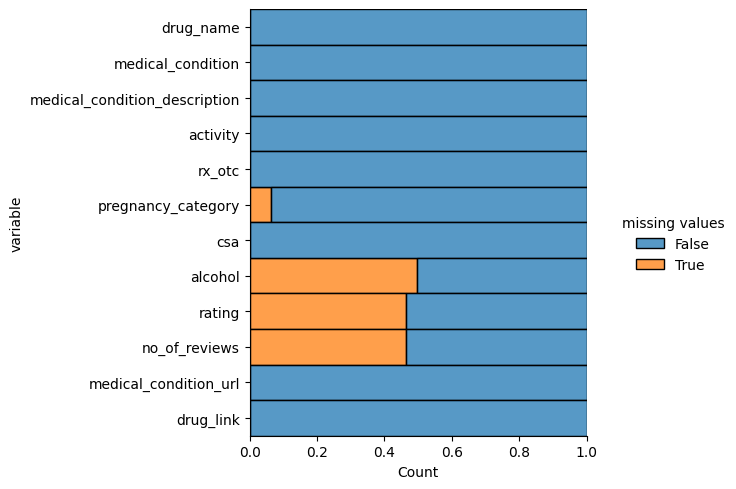

In [149]:
#Visualisation des pourcentages de valeurs manquantes
plt.figure(figsize=(6,4))
sns.displot(
    data=df1.isna().melt(value_name="missing values"),
    y="variable",
    hue="missing values",
    multiple="fill",
    aspect=1.25
)

Variable1: **Rating**

In [150]:
df1["rating"].isnull().sum()/len(df1["rating"])


0.4652690073250821

Environ 46% des données présentes dans la variable cible (rating) sont manquantes. L'imputation dans une telle situation peut conduire à un modèle biaisé et influencer par conséquent les résultats de la prédiction. Pour remédier à cela, nous allons supprimer ces enregistrements.

In [151]:
df1.dropna(subset=['rating'],axis=0, inplace=True)
#On reorganise l'index du DataFrame
df1.reset_index(drop=True, inplace=True)


<Figure size 600x1000 with 0 Axes>

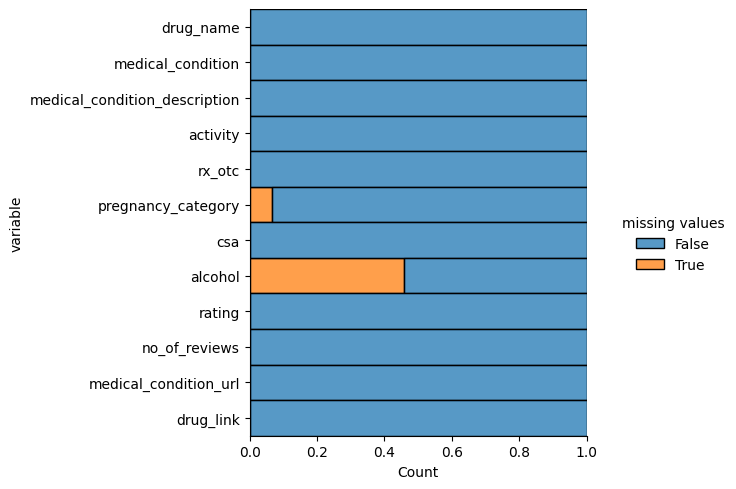

In [152]:
#Verification 
plt.figure(figsize=(6,10))
sns.displot(
    data=df1.isna().melt(value_name="missing values"),
    y="variable",
    hue="missing values",
    multiple="fill",
    aspect=1.25
)

Variable2: **Alcohol**


50% des valeurs de la variable "alcohol" sont manquantes. Par conséquent, on va supprimer cette variable.

In [153]:
df1=df1.drop(columns='alcohol')

<Figure size 600x1000 with 0 Axes>

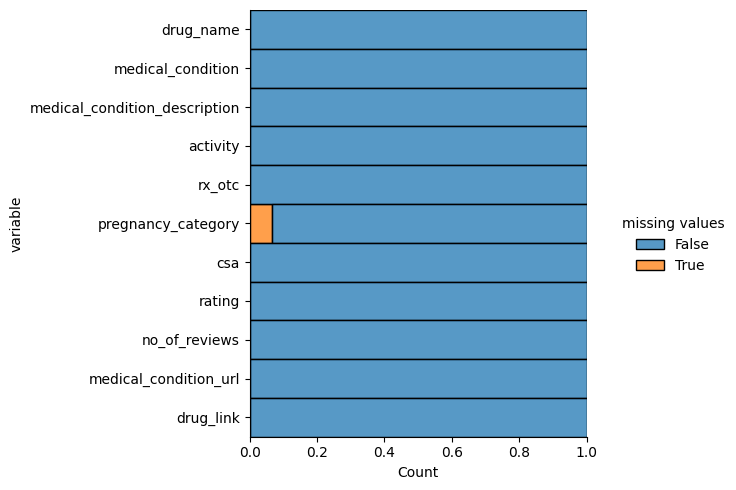

In [154]:
#Verification 
plt.figure(figsize=(6,10))
sns.displot(
    data=df1.isna().melt(value_name="missing values"),
    y="variable",
    hue="missing values",
    multiple="fill",
    aspect=1.25
)

Variable3: **pregnancy_category**

Afin de résoudre le problème des valeurs manquantes dans la variable "pregnancy_category", nous allons encoder la variable avec la fonction "get_dummies". Les valeurs manquantes seront ignorées. Le résultat final pour un enregistrement contenant une valeur manquante sera : [0 0 0 0 0 0].

In [155]:
#using get dummies
cat_var = df1['pregnancy_category']
cat_dummies = pd.get_dummies(cat_var)
cat_dummies.head()

,A,B,C,D,N,X
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,1,0,0,0,0


In [156]:
df1=df1.drop("pregnancy_category", axis=1)

In [157]:
df1=pd.concat([df1,cat_dummies],axis=1)

In [158]:
#Affichage des colonnes de la nouvelle dataset
df1.columns

Index(['drug_name', 'medical_condition', 'medical_condition_description',
       'activity', 'rx_otc', 'csa', 'rating', 'no_of_reviews',
       'medical_condition_url', 'drug_link', 'A', 'B', 'C', 'D', 'N', 'X'],
      dtype='object')

In [159]:
#Verificaiton
df1.isna().sum()

drug_name                        0
medical_condition                0
medical_condition_description    0
activity                         0
rx_otc                           0
csa                              0
rating                           0
no_of_reviews                    0
medical_condition_url            0
drug_link                        0
A                                0
B                                0
C                                0
D                                0
N                                0
X                                0
dtype: int64

# Encodage des variables categoriques

In [160]:
#using get dummies
cat_variables = df1[['medical_condition', 'rx_otc', 'csa']]
cat_dummies = pd.get_dummies(cat_variables)
cat_dummies.head()

,medical_condition_ADHD,medical_condition_AIDS/HIV,medical_condition_Acne,medical_condition_Allergies,medical_condition_Alzheimer's,medical_condition_Angina,medical_condition_Anxiety,medical_condition_Asthma,medical_condition_Bipolar Disorder,medical_condition_Bronchitis,...,medical_condition_Weight Loss,rx_otc_OTC,rx_otc_Rx,csa_2,csa_3,csa_4,csa_5,csa_M,csa_N,csa_U
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [161]:
df1.columns

Index(['drug_name', 'medical_condition', 'medical_condition_description',
       'activity', 'rx_otc', 'csa', 'rating', 'no_of_reviews',
       'medical_condition_url', 'drug_link', 'A', 'B', 'C', 'D', 'N', 'X'],
      dtype='object')

In [162]:
df1=pd.concat([df1,cat_dummies],axis=1)

In [163]:
df1.head()

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,csa,rating,no_of_reviews,medical_condition_url,drug_link,...,medical_condition_Weight Loss,rx_otc_OTC,rx_otc_Rx,csa_2,csa_3,csa_4,csa_5,csa_M,csa_N,csa_U
0,doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.87,Rx,N,6.8,760.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html,...,0,0,1,0,0,0,0,0,1,0
1,spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.82,Rx,N,7.2,449.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html,...,0,0,1,0,0,0,0,0,1,0
2,minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.48,Rx,N,5.7,482.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html,...,0,0,1,0,0,0,0,0,1,0
3,Accutane,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.41,Rx,N,7.9,623.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/accutane.html,...,0,0,1,0,0,0,0,0,1,0
4,clindamycin,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.39,Rx,N,7.4,146.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/mtm/clindamycin-topical....,...,0,0,1,0,0,0,0,0,1,0


# Normalisation

In [164]:
#Normalisation
scaler = MinMaxScaler()
num_variables = df1[['rating', 'no_of_reviews']]

df_normalised = pd.DataFrame(scaler.fit_transform(num_variables), columns = num_variables.columns)
df_normalised.head()

,rating,no_of_reviews
0,0.68,0.258779
1,0.72,0.152745
2,0.57,0.163996
3,0.79,0.212070
4,0.74,0.049437


In [165]:
df1[['rating', 'no_of_reviews']] = df_normalised[['rating', 'no_of_reviews']]
df1.head()

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,csa,rating,no_of_reviews,medical_condition_url,drug_link,...,medical_condition_Weight Loss,rx_otc_OTC,rx_otc_Rx,csa_2,csa_3,csa_4,csa_5,csa_M,csa_N,csa_U
0,doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.87,Rx,N,0.68,0.258779,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html,...,0,0,1,0,0,0,0,0,1,0
1,spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.82,Rx,N,0.72,0.152745,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html,...,0,0,1,0,0,0,0,0,1,0
2,minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.48,Rx,N,0.57,0.163996,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html,...,0,0,1,0,0,0,0,0,1,0
3,Accutane,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.41,Rx,N,0.79,0.212070,https://www.drugs.com/condition/acne.html,https://www.drugs.com/accutane.html,...,0,0,1,0,0,0,0,0,1,0
4,clindamycin,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,0.39,Rx,N,0.74,0.049437,https://www.drugs.com/condition/acne.html,https://www.drugs.com/mtm/clindamycin-topical....,...,0,0,1,0,0,0,0,0,1,0


# Features Selection

Les colonnes ,'medical_condition_description', 'medical_condition_url'et 'drug_link' ne seront pas utilisées lors de l'étape de modélisation, nous allons donc les supprimer.

In [166]:
df1=df1.drop(['drug_name','medical_condition','medical_condition_description','rx_otc','csa', 'medical_condition_url','drug_link'],axis=1)

**Test Chi 2**

Le test Chi2 va nous permettre de déterminer les variables les plus significatives pour prédire la variable cible (rating)

In [167]:
X=df1.drop(['rating'],axis=1)
Y=df1['rating']
Y=Y.astype('int')

In [168]:
selector = SelectKBest(score_func=chi2, k=40)  # Sélectionner les 40 meilleures variables
X_new = selector.fit_transform(X, Y)
# Obtenir les indices des variables sélectionnées
selected_indices = selector.get_support(indices=True)

# Obtenir les noms des variables sélectionnées
selected_features = X.columns[selected_indices]

# Afficher les noms des variables sélectionnées
print("Variables sélectionnées :", selected_features.tolist())

Variables sélectionnées : ['activity', 'no_of_reviews', 'B', 'D', 'N', 'X', 'medical_condition_ADHD', 'medical_condition_Acne', 'medical_condition_Angina', 'medical_condition_Bipolar Disorder', 'medical_condition_Bronchitis', 'medical_condition_COPD', 'medical_condition_Cancer', 'medical_condition_Colds & Flu', 'medical_condition_Constipation', 'medical_condition_Covid 19', 'medical_condition_Depression', 'medical_condition_Diabetes (Type 1)', 'medical_condition_Diabetes (Type 2)', 'medical_condition_Eczema', 'medical_condition_Erectile Dysfunction', 'medical_condition_GERD (Heartburn)', 'medical_condition_Gout', 'medical_condition_Hair Loss', 'medical_condition_Hayfever', 'medical_condition_Herpes', 'medical_condition_Hypertension', 'medical_condition_Incontinence', 'medical_condition_Insomnia', 'medical_condition_Migraine', 'medical_condition_Osteoarthritis', 'medical_condition_Pain', 'medical_condition_Pneumonia', 'medical_condition_Schizophrenia', 'medical_condition_Stroke', 'medic

In [169]:
df2=df1[selected_features]
df2.head()

,activity,no_of_reviews,B,D,N,X,medical_condition_ADHD,medical_condition_Acne,medical_condition_Angina,medical_condition_Bipolar Disorder,...,medical_condition_Osteoarthritis,medical_condition_Pain,medical_condition_Pneumonia,medical_condition_Schizophrenia,medical_condition_Stroke,medical_condition_Swine Flu,medical_condition_UTI,rx_otc_OTC,rx_otc_Rx,csa_4
0,0.87,0.258779,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.82,0.152745,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.48,0.163996,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.41,0.212070,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.39,0.049437,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [170]:
df2.to_csv('drugs_for_common_treatments_cleaned.csv',index=False)
